In [13]:
# Utilities
from pathlib import Path
import os
import subprocess as sp

# Data
import pandas as pd
import numpy as np

# Brain
import nibabel as nb
from nibabel.freesurfer.io import read_annot, read_label, read_morph_data
import cortex
import src.mesh_laplace_sulci

# Plotting
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt


In [17]:



# project_dir = Path('/Users/benparker/Desktop/cnl/CNL_scalpel/results/')
# subjects_dir = Path('/Users/benparker/Desktop/cnl/subjects/')
# subjects_dir_str = '/Users/benparker/Desktop/cnl/subjects/'

# ## read_annot returns [0] labels at each vertex, -1 for no id [1]: ctab [2]: label names 
# annot_verts, annot_ctab, annot_names = read_annot(subjects_dir / '100307/label/rh.aparc.a2009s.annot')


# # import test subject to pycortex db
# cortex.freesurfer.import_subj('100307', freesurfer_subject_dir=subjects_dir_str, whitematter_surf='white')


def read_label(label_name):
    """
    Reads a freesurfer-style .label file (5 columns)
    
    Parameters
    ----------
    label_name: str 
    
    Returns 
    -------
    vertices: index of the vertex in the label np.array [n_vertices] 
    RAS_coords: columns are the X,Y,Z RAS coords associated with vertex number in the label, np.array [n_vertices, 3] 
    
    """
    
    # read label file, excluding first two lines of descriptor 
    df_label = pd.read_csv(label_name,skiprows=[0,1],header=None,names=['vertex','x_ras','y_ras','z_ras','stat'],delimiter='\s+')
    
    vertices = np.array(df_label.vertex) 
    RAS_coords = np.empty(shape = (vertices.shape[0], 3))
    RAS_coords[:,0] = df_label.x_ras
    RAS_coords[:,1] = df_label.y_ras
    RAS_coords[:,2] = df_label.z_ras
    
    return vertices, RAS_coords



In [64]:
## Load labels for boundary sulci


vertices, coords = read_label('~/Desktop/cnl/subjects/100307/label/lh.MCGS.label')


def find_inferior_boundary(read_label):
    # for each A value, find the vertex with the lowest S value
      vertex_num = read_label[0]
      ras_coords = read_label[1]
      
      r_data = np.array([ras[0] for ras in ras_coords])
      a_data = np.array([ras[1] for ras in ras_coords])
      s_data = np.array([ras[2] for ras in ras_coords])

      inferior_boundary = np.array([])
       
      rounded_anterior = np.round(a_data, decimals=0)
    
      for anterior in np.unique(rounded_anterior):
        column_idx = np.where(rounded_anterior == anterior)
        min_idx = np.min(s_data[column_idx])
        np.append(inferior_boundary, ras_coords[min_idx])
      
#     for vertex in ras_coords:
    

r_data = np.array([ras[0] for ras in coords])
a_data = np.array([ras[1] for ras in coords])
s_data = np.array([ras[2] for ras in coords])

# find_inferior_boundary([vertices, coords])


In [72]:
# get indexes for all vertices maching the column
rounded_anterior = np.round(a_data, decimals=0)
unique_vals = np.unique(np.round(a_data))
idx = np.where(rounded_anterior == unique_vals[0])[0]

np.where(s_data[idx] == np.amin(s_data[idx]))




(array([21]),)

In [76]:
np.amin(s_data[idx])

23.236

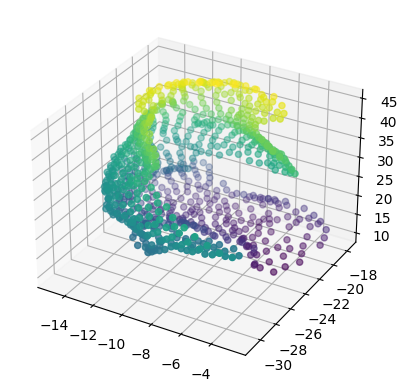

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(r_data, a_data, s_data, cmap='viridis', c=s_data)

In [33]:


## split FC map by boundary sulci

##### ID vertices within boundary by [0] from read annot

array([-30., -30., -31., -31., -30., -30., -31., -31., -31., -31., -30.,
       -31., -31., -31., -31., -31., -30., -30., -30., -31., -31., -31.,
       -31., -31., -30., -30., -30., -30., -31., -31., -30., -30., -30.,
       -31., -31., -31., -31., -30., -29., -29., -30., -30., -29., -29.,
       -30., -30., -29., -30., -30., -29., -28., -30., -30., -29., -29.,
       -29., -30., -30., -30., -31., -31., -30., -30., -29., -29., -29.,
       -29., -30., -30., -31., -31., -30., -29., -30., -30., -30., -28.,
       -29., -29., -28., -28., -29., -28., -28., -28., -28., -28., -28.,
       -28., -28., -28., -29., -29., -28., -28., -29., -29., -30., -30.,
       -29., -29., -28., -28., -28., -28., -29., -30., -30., -30., -28.,
       -28., -28., -28., -29., -29., -29., -28., -28., -28., -28., -28.,
       -27., -27., -27., -27., -27., -27., -28., -27., -27., -27., -28.,
       -27., -28., -28., -28., -28., -27., -28., -28., -28., -28., -28.,
       -27., -27., -27., -27., -27., -27., -27., -2